# Influence of the number of session on performance and learning time

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from glob import glob
import numpy as np

In [2]:
import nibabel
from nilearn import plotting
from nilearn.image import mean_img

/home/parietal/hrichard/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
def extract_info(path):
    s = path.split("alignment_")[1]
    algo = s.split("algo")[1].split("subject")[0]
    test_subject = s.split("subject_")[1].split("train")[0].split("-")
    train_runs = s.split("trainruns_")[1].split("testruns")[0].split("-")
    test_runs = s.split("testruns_")[1].split("_exp14")[0].split("-")
    return algo, test_subject, train_runs, test_runs

### Results files

In [33]:
algorithms = ['scaled', 'srm', 'hyperalignment', 'mean', 'ridgeCV', 'RRRCVs'] 
for algo in algorithms:
    paths = glob("/storage/workspace/hrichard/results/exp14/ibc_timepred*algo"+algo + "*testruns_1-6*")
    print(len(paths))
    for path in paths:
        print(extract_info(path))

70
('scaled_srm_ortho', ['8'], ['5'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['0'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['10', '4', '12'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['10', '3', '4'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['7', '16', '0', '10', '4'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['0', '16', '4', '3', '12'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['5', '12', '2', '16', '11', '10', '15'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['9', '10', '7', '3', '0', '2', '5'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['4', '0', '7', '8', '5', '12', '3', '14', '15'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['7', '5', '4', '15', '11', '9', '14', '3', '10'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['5', '10', '9', '4', '14', '11', '8', '2', '7', '0', '15'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['16', '15', '7', '5', '2', '14', '4', '3', '13', '9', '8'], ['1', '6'])
('scaled_srm_ortho', ['8'], ['11', '12', '10', '9', '16', '3', '15', '5', '7', '14', '13', '0', '2'], ['1

## Performance of different algorithms

##Compared algorithms
- Hyperalignment (should be changed to Scaled orthogonal transform): Linear regression wirh orthogonality constrains (mapping algorithm).
- scaled_srm_ortho: Shared response model with scaled orthogonal transform (template algorithm)
- ridgeCV: Ridge constrains with automatic setting of parameters (mapping algorithm)
- mean: Identity regression (mapping algorithm)
- srm_ortho: Shared response model with unscaled orthogonal transform (template algorithm)
- RRRCV: Reduced rank regression with automatic setting of parameters (mapping algorithm)
- mean: Identity regression (mapping algorithm)

In [35]:
algorithms = ['scaled', 'srm', 'hyperalignment', 'mean', 'ridgeCV', 'RRRCV']
test_subjects = []
train_runs = []
test_runs = []

algos_score = []
algos_time = []
for algorithm in algorithms:
    path_dict = {}
    algo_score = []
    for path in glob("/storage/workspace/hrichard/results/exp14/ibcalignment*algo"+algorithm + "*testruns_1-6*"):
        algo, test_subject, train_run, test_run = extract_info(path)
        if len(train_run) not in path_dict:
            path_dict[len(train_run)] = []
        path_dict[len(train_run)].append(path)

    for k, v in path_dict.items():
        img = mean_img(v)
        X = img.get_data()
        score = len(X[X>0.05])
        print(algorithm + " - " + str(k) + ": " + str(score))
        algo_score.append(score)
    algos_score.append(algo_score)

scaled - 1: 574
scaled - 3: 756
scaled - 5: 853
scaled - 7: 875
scaled - 9: 915
scaled - 11: 940
scaled - 13: 953
srm - 1: 559
srm - 3: 660
srm - 5: 720
srm - 7: 793
srm - 9: 774
srm - 11: 813
srm - 13: 814
hyperalignment - 1: 188
hyperalignment - 3: 382
hyperalignment - 5: 509
hyperalignment - 7: 560
hyperalignment - 9: 594
hyperalignment - 11: 625
hyperalignment - 13: 630
mean - 1: 41
mean - 3: 41
mean - 5: 41
mean - 7: 41
mean - 9: 41
mean - 11: 41
mean - 13: 41
ridgeCV - 1: 655
ridgeCV - 3: 795
ridgeCV - 5: 896
ridgeCV - 7: 896
ridgeCV - 9: 924
ridgeCV - 11: 939
ridgeCV - 13: 944
RRRCV - 1: 506
RRRCV - 3: 164
RRRCV - 5: 39
RRRCV - 7: 23
RRRCV - 9: 23
RRRCV - 11: 6
RRRCV - 13: 884


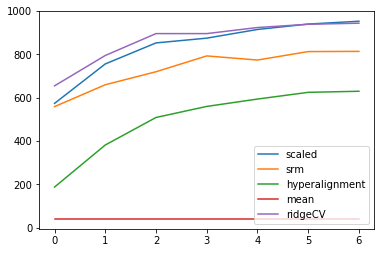

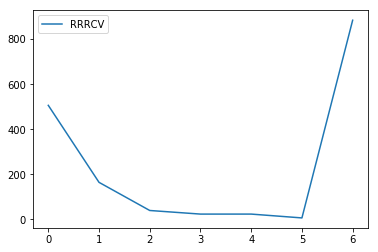

In [36]:
for i in range(len(algos_score)-1):
    plt.plot(algos_score[i], label=algorithms[i])
plt.legend()

plt.figure()
i = len(algos_score)-1
plt.plot(algos_score[i], label=algorithms[i])
plt.legend()

## Execution time of different algorithms

##Compared algorithms
- Hyperalignment (should be changed to Scaled orthogonal transform): Linear regression wirh orthogonality constrains (mapping algorithm).
- scaled_srm_ortho: Shared response model with scaled orthogonal transform (template algorithm)
- ridgeCV: Ridge constrains with automatic setting of parameters (mapping algorithm)
- mean: Identity regression (mapping algorithm)
- srm_ortho: Shared response model with unscaled orthogonal transform (template algorithm)
- RRRCV: Reduced rank regression with automatic setting of parameters (mapping algorithm)
- mean: Identity regression (mapping algorithm)

In [37]:
algorithms = ['scaled', 'srm', 'hyperalignment', 'mean', 'ridgeCV', 'RRRCV']
test_subjects = []
train_runs = []
test_runs = []

algos_time = []
for algorithm in algorithms:
    path_dict = {}
    for path in glob("/storage/workspace/hrichard/results/exp14/ibc_timepred*algo"+algorithm + "*testruns_1-6*"):
        algo, test_subject, train_run, test_run = extract_info(path)
        if len(train_run) not in path_dict:
            path_dict[len(train_run)] = []
        path_dict[len(train_run)].append(path)

    algo_time = []
    algo_ttl_time = 0
    for k, v in path_dict.items():
        time_list = []
        for pth in v:
            with open(pth, "r") as time_file:
                #print(extract_info(pth))
                time_string = time_file.read()
                #print(time_string)
                time_list.append(float(time_string.split(".")[0]))
        time_array = np.array(time_list)
        ttl_time = time_array.mean()
        #print(k, len(v), time_array)
        algo_time.append(ttl_time)
        algo_ttl_time += ttl_time
        print(algorithm, algo_ttl_time)
    algos_time.append(algo_time)

('scaled', 7.4000000000000004)
('scaled', 36.5)
('scaled', 65.400000000000006)
('scaled', 106.60000000000001)
('scaled', 193.40000000000001)
('scaled', 369.60000000000002)
('scaled', 612.60000000000002)
('srm', 3.2000000000000002)
('srm', 11.0)
('srm', 23.300000000000001)
('srm', 39.799999999999997)
('srm', 96.299999999999997)
('srm', 179.19999999999999)
('srm', 301.89999999999998)
('hyperalignment', 48.299999999999997)
('hyperalignment', 93.699999999999989)
('hyperalignment', 137.79999999999998)
('hyperalignment', 183.79999999999998)
('hyperalignment', 233.79999999999998)
('hyperalignment', 284.09999999999997)
('hyperalignment', 335.99999999999994)
('mean', 2.7999999999999998)
('mean', 4.0999999999999996)
('mean', 4.6999999999999993)
('mean', 5.1999999999999993)
('mean', 5.7999999999999989)
('mean', 6.6999999999999993)
('mean', 7.6999999999999993)
('ridgeCV', 38.5)
('ridgeCV', 99.200000000000003)
('ridgeCV', 192.19999999999999)
('ridgeCV', 295.60000000000002)
('ridgeCV', 387.300000000

['scaled', 'srm', 'hyperalignment', 'mean', 'ridgeCV', 'RRRCV']


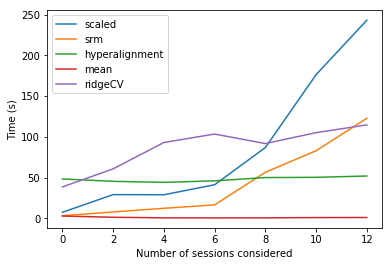

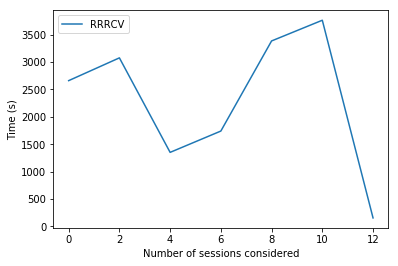

In [38]:
print(algorithms)
algorithms = ['scaled', 'srm', 'hyperalignment', 'mean', 'ridgeCV', 'RRRCV']

for i in range(len(algos_time)-1):
    #print(algos_time[i])
    plt.plot(np.array(range(len(algos_time[i])))*2, algos_time[i], label=algorithms[i])
plt.legend()
plt.ylabel("Time (s)")
plt.xlabel("Number of sessions considered")

plt.figure()
i = len(algos_time)-1
plt.plot(np.array(range(len(algos_time[i])))*2, algos_time[i], label=algorithms[i])
plt.legend()
plt.ylabel("Time (s)")
plt.xlabel("Number of sessions considered")